 # Stufe 1
 Lies den Tafelanschrieb noch einmal durch.
 Vollziehe das einfache Regressionsbeispiel von vanderPlas nach .
 Tippe dazu den Code selbst (möglichst aus dem Gedächtnis) ein.(Nicht kopieren!)

 Stufe2
 Vollziehe den Code mit den PolynomialFeatures nach, aber ohne Pipeline

 Stufe 3
 Vollziehe den Code bei Frochte nach und mache eine Klasse daraus mit fit und predict.
 Lassen sich Geschwindigkeitsunterschiede zwischen dieser Klasse und der Klasse aus scikit-learn feststellen?

 # Imports:

In [1]:
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from mlalfa.linear_regression import LinearRegressor
from IPython import get_ipython
if type(get_ipython()).__name__ == 'ZMQInteractiveShell':  # IPython Notebook!
    get_ipython().run_line_magic('matplotlib', 'inline')  # '%matplotlib inline'
    get_ipython().run_line_magic('load_ext', 'autoreload')  # '%load_ext autoreload'
    get_ipython().run_line_magic('autoreload', '2')  # '%autoreload 2' (reloads everything)
# Change working directory to file location:
os.chdir(R'C:\Users\Jan\Projects\mlalfa\scripts')
_log = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)
np.random.seed(42)



 # Teil 1: Regressionsbeispiel von vanderPlas (Python Data Science Handbook)
 ## Create training data and plot them:

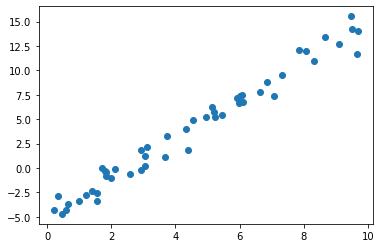

In [2]:
x = 10 * np.random.rand(50)
y = 2 * x - 5 + np.random.randn(50)
plt.scatter(x, y)


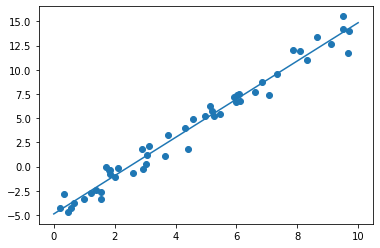

In [3]:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)


In [4]:
print('Model slope:     ', model.coef_[0])
print('Model intercept: ', model.intercept_)



Model slope:      1.9776566003853107
Model intercept:  -4.903310725531115


 # Polynom 7th grade without pipeline:

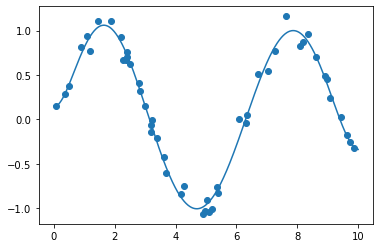

In [5]:
poly = PolynomialFeatures(7, include_bias=True)
x = 10 * np.random.rand(50)
y = np.sin(x) + 0.1 * np.random.randn(50)

poly.fit_transform(x[:, None])

model = LinearRegression()

model.fit(poly.transform(x[:, None]), y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(poly.transform(xfit[:, None]))

plt.scatter(x, y)
plt.plot(xfit, yfit)



 # More elegant solution with pipeline:

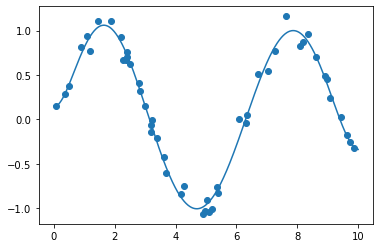

In [6]:
poly_model = make_pipeline(poly, model)

poly_model.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, None])

plt.scatter(x, y)
plt.plot(xfit, yfit)



 # Short showcase in Frochte:

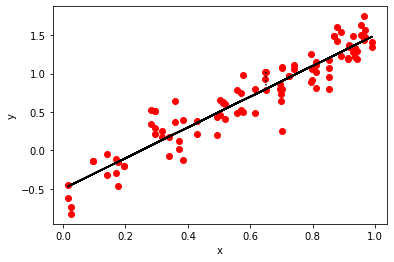

In [7]:
x = np.random.rand(50)
x = np.hstack((x, x))
y = 2*x - 0.5
noise = 0.2*np.random.normal(size=x.shape[0])
ym = y + noise
plt.plot(x, y, color='k')
r = np.array([[x[95], x[95]], [ym[95], y[95]]])
plt.plot(r[0, :], r[1, :], 'k:')
plt.scatter(x, ym, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



 # Use own implemented class:

In [8]:
X = np.loadtxt(os.path.join('data', 'BostonFeature.csv'), delimiter=',')
y = np.loadtxt(os.path.join('data', 'BostonTarget.csv'), delimiter=',')
train_idx = np.random.choice(X.shape[0], int(X.shape[0]*0.80), replace=False)
test_idx = np.delete(np.arange(0, len(y)), train_idx)

X_train = X[train_idx, :]
y_train = y[train_idx]
X_test = X[test_idx, :]
y_Test = y[test_idx]


In [9]:
model = LinearRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
res_test = y_predict - y_Test  # Residuals on test set
res_train = y_train - model.predict(X_train)# Residuals on train set


Text(0, 0.5, 'Anzahl')

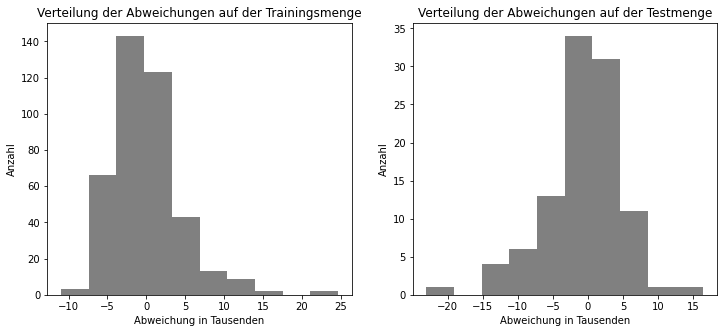

In [10]:
fig = plt.figure(1, figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Verteilung der Abweichungen auf der Trainingsmenge')
ax.hist(res_train, color='gray')
ax.set_xlabel('Abweichung in Tausenden')
ax.set_ylabel('Anzahl')
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Verteilung der Abweichungen auf der Testmenge')
ax.hist(res_test, color='gray')
ax.set_xlabel('Abweichung in Tausenden')
ax.set_ylabel('Anzahl')